In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Calculates cube root $ x = \sqrt[3]{a} $ using newton's method for the function $ f(x) = x^3 - a $.

In other words, we follow the simple algorithmic scheme:

$
\begin{align}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\Rightarrow x_{n+1} = x_n - \frac{x_n^3 - a}{3 x_n^2}
\end{align}
$

until convergence or maximum number of iterations.

In [143]:
def cube_root(a, n_iter=50, x_init=1):
    x = x_init
    x_seq = []
    f_seq = []
    for i in range(n_iter):
        f = x**3 - a
        x = x - f/(3*x**2)
        
        x_seq.append(x)
        f_seq.append(f)
        
        if (np.abs(f)<1e-8):
            break
    return x, x_seq, f_seq

In [168]:
#Returns a sequence of logs of the values of the function f throughout the iteractions in the algorithm

def log_error_seq(a, x_init=1):
    x, x_seq, f_seq = cube_root(a, x_init=x_init)
    return np.log(f_seq)

If starting sufficiently close to a root of f, Newton's method should converge
quadratically, that is:

$$ \left|x_{n+1} - \sqrt[3]{a}\right| \leq M \left|x_{n} - \sqrt[3]{a}\right|^2 $$

except when $ f'(\sqrt[3]{a}) = 0 $.

The function bellow returns the sequence of the values of $ \frac{\left|x_{n+1} - \sqrt[3]{a}\right|}{\left|x_{n} - \sqrt[3]{a}\right|^2} $ for each iteraction, which we call a "quadratic rate", and expect to be limited above.

In [171]:
def quadratic_rate(a, x_init=1):
    x, x_seq, f_seq = cube_root(a, x_init=x_init)
    return ((x_seq - np.cbrt(a))/(np.roll(x_seq,1) - np.cbrt(a))**2)[1:-1]

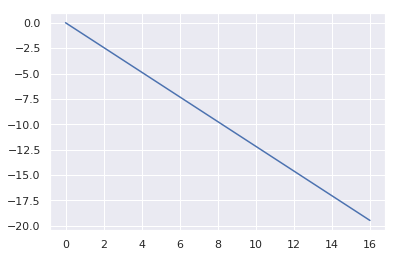

In [169]:
plt.plot(log_error_seq(0))

The value of the error for $ a = 0 $ decreases linearly. Why?

Simply put, each iteration of the Newton's method goes like

$
\begin{align}
x_{n+1} = x_n - \frac{x_n^3}{3 x_n^2} \Rightarrow x_{n+1} = x_n - \frac{x_n}{3} = \frac{2}{3} x_n
\end{align}
$

Since $ f'(\sqrt[3]{a}) = 3 (\sqrt[3]{a})^2 = 0 $, we do not have a guaranty of quadratic convergence, as we see in the graph below.

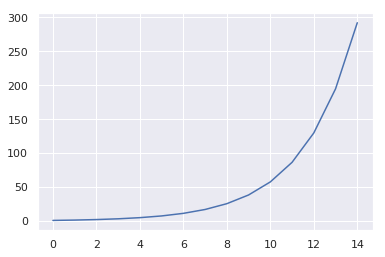

In [173]:
plt.plot(quadratic_rate(0))

/home/db/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


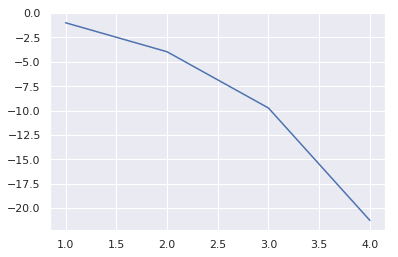

In [174]:
plt.plot(log_error_seq(2))

For $ a = 2 $ and $ a = 10 $, we have the rates bounded above for most iterations:

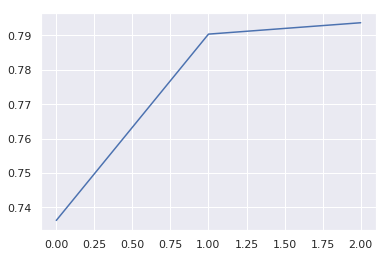

In [175]:
plt.plot(quadratic_rate(2))

/home/db/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


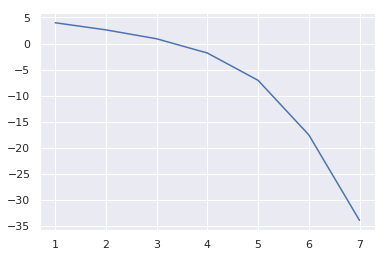

In [177]:
plt.plot(log_error_seq(10))

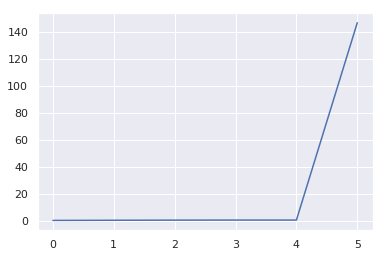

In [178]:
plt.plot(quadratic_rate(10))

A roundoff error makes the convergence rate in the last iteration for $ a=10 $ to jump. The algorithm should have stopped at $ f(x_n) ~ 10^{-9} $. But, from the penultimate iteration, where the value is $ ~ 10^{-8} $ the value of f is already reduced to $ ~ 10^{-15} $ in the last one, almost the value of the eps. The last value of $ |x_n - x_{n-1}| $ is not distinguishable from zero by the floating point system, leading to a pronounced roundoff error in $ 1/|x_n - x_{n-1}|^2 $.

This is no problem for Newton's method, because the convergence is still made in the same number of steps, regardless of the roundoff errors in the last evaluation of the quadratic rate.

In [186]:
x, x_seq, f_seq = cube_root(10)

print(f_seq[-2])
print(f_seq[-1])
print(np.finfo(np.float).eps)

print(x_seq[-1] - x_seq[-2])

2.4234791951016632e-08
1.7763568394002505e-15
2.220446049250313e-16
0.0
